In [44]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import norm, uniform

In [85]:
x = uniform.rvs(loc=0,scale=4,size=1000)
y = norm.rvs(loc=1+2*x,scale=0.2+0.5*x)

X = np.hstack([np.full((x.shape[0],1),1),x.reshape(-1,1)])
T_mean = np.array([[0],[1]])
T_var = np.array([[0.1],[0.1]])
Y = y.reshape(-1,1)

In [86]:
def LL(X,Y,T_mean,T_var):
    V = (X@T_var)
    M = (X@T_mean)
    return (((Y-M)**2)/V + np.log(V)).mean()

def grad_LL_var(X,Y,T_mean,T_var):
    V = (X@T_var)
    M = (X@T_mean)
    return X.T@((2*(Y-M)**2 - V)/(V**2))/2

def grad_LL_mean(X,Y,T_mean,T_var):
    V = (X@T_var)
    M = (X@T_mean)
    return -X.T@((Y-M)/V)

# cool.

def grad_desc(X,Y,T_mean,T_var,eta=0.001,n_iter=100000,conv=0.01):
    
    i = 0
    new_T_mean = T_mean
    new_T_var = T_var
    while i < n_iter:
        new_T_mean = T_mean - eta*grad_LL_mean(X,Y,T_mean,T_var)
        new_T_var = T_var - eta*grad_LL_mean(X,Y,T_mean,T_var)
        
        if (((new_T_mean-T_mean)**2).max() < conv and ((new_T_var-T_var)**2).max() < conv):
            break
            
        T_mean = new_T_mean
        T_var = new_T_var
        
        i += 1
        
    if (i == n_iter):
        print("n_iter hit")
    
    return (new_T_mean, new_T_var)

In [87]:
(est_T_mean,est_T_var) = grad_desc(X,Y,T_mean,T_var,eta=0.001,n_iter=1000000,conv=0.0001)
est_T_std = np.sqrt(est_T_var)
print(est_T_mean,est_T_var)

[[0.97482166]
 [1.98956913]] [[1.07482166]
 [1.08956913]]


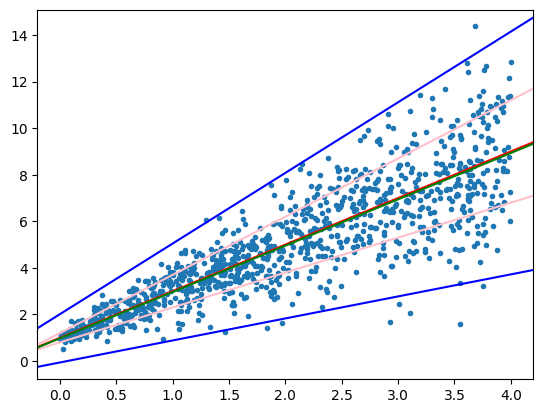

In [88]:
plt.scatter(x,y,marker='.')
plt.axline((0,1),slope=2,color='r')
plt.axline((0,1.2),slope=2.5,color='pink')
plt.axline((0,0.8),slope=1.5,color='pink')
plt.axline((0,est_T_mean[0][0]), slope=est_T_mean[1][0], color='g')
plt.axline((0,est_T_mean[0][0]+est_T_std[0][0]), slope=est_T_std[1][0]+est_T_mean[1][0], color='b')
plt.axline((0,est_T_mean[0][0]-est_T_std[0][0]), slope=est_T_mean[1][0]-est_T_std[1][0], color='b')

In [29]:
A = np.random.random((5,8))
A.max()

0.9800426658882774

In [89]:
LL(X,Y,np.array([[1],[2]]), np.array([[0.2],[0.5]]))

1.283062969210816

In [90]:
LL(X,Y,est_T_mean,est_T_var)

1.565418484372129